## 4.1 Ferramentas de Programação Matemática

In [1]:
def minha_funcao(var_1, var_2): 
    resultado = var_1 + var_2 + 3
    return resultado

In [2]:
minha_funcao(1, 2)

6

In [3]:
from math import log, sqrt, exp
from scipy import stats
def black_scholes(S0, K, T, r, sigma):
    d1 = (log(S0 / K) + (r + (sigma ** 2)/2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return (S0 * stats.norm.cdf(d1, 0.0, 1.0) - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))

In [4]:
black_scholes(100, 100, 1, 0.05, 0.20)

10.450583572185565

## 4.2 Árvore binomial

In [5]:
[x*2 for x in [1, 2, 3, 4, 5]]

[2, 4, 6, 8, 10]

In [6]:
celsius = [38.2, 30, 34.8, 44]
fahrenheit = [ 9/5*x + 32 for x in celsius ]
fahrenheit

[100.76, 86.0, 94.63999999999999, 111.2]

In [7]:
from math import exp, sqrt 
def arvore_binomial_simplificada(S0, K, T, r, sigma, N=300): 
    # Define: delta t, u, d, a, p e um_menos_p. 
    delta_t = T / N
    u = exp(sigma * sqrt(delta_t))
    d = 1.0 / u
    a = exp(r * delta_t)
    p = (a - d) / (u - d)
    um_menos_p = 1.0 - p
    
    # Cria a estrutura da árvore com todos os valores iguais a zero. 
    arv_b = [[0.0 for j in range(i + 1)] for i in range(N + 1)]
    
    # Cálcula o valor dos últimos nós da árvore binomial. 
    for j in range(N + 1):
        arv_b[N][j] = max(S0 * u**j * d**(N - j) - K, 0.0)
    
    # Calcula os nós intermediários, dos últimos para o nó raiz.
    for i in reversed(range(N)): 
        for j in range(i+1): 
            arv_b[i][j] = exp(-r * delta_t) * (p * arv_b[i+1][j + 1] +  um_menos_p * arv_b[i+1][j])
    
    # O valor do nó inicial da árvore é o valor da opção.
    return arv_b[0][0]

In [8]:
arvore_binomial_simplificada(S0=8.50, K=10, T=1.0, r=0.10, sigma=0.35)

0.9628409345029771

In [9]:
arvore_binomial_simplificada(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, N=4)

1.0208463755398038

## 4.3 Árvore completa / Convergência com Black-Scholes

In [10]:
from math import exp, sqrt
def arvore_binomial_completa(S0, K, T, r, sigma, q, call_put_flag='c', N=300): 
    # Define: delta_t, u, d, a, p e um_menos_p.
    delta_t = T / N
    u = exp(sigma * sqrt(delta_t))
    d = 1.0 / u
    a = exp((r - q) * delta_t)
    p = (a - d) / (u - d)
    um_menos_p = 1.0 - p
    
    # Cria a estrutura da árvore com todos os valores iguais a zero.
    arv_b = [[0.0 for j in range(i + 1)] for i in range(N + 1)]
    
    # Cálcula o valor dos últimos nós da árvore binomial.
    for j in range(N + 1):
        if call_put_flag == 'c': 
            arv_b[N][j] = max(S0 * u**j * d**(N - j) - K, 0.0)
        else:
            arv_b[N][j] = max(K - S0 * u**j * d**(N - j), 0.0)
    
    # Calcula os nós intermediários, dos últimos para o nó raiz.
    for i in reversed(range(N)):
        for j in range(i + 1):
            valor_acao = S0 * d**i * u**(2*j)
            if call_put_flag == 'c':
                valor_imediato = max(valor_acao - K, 0) 
            else:
                valor_imediato = max(K - valor_acao, 0) 
            valor_esperado = exp(-r * delta_t)*(p*arv_b[i + 1][j + 1] + um_menos_p * arv_b[i + 1][j])
            arv_b[i][j] = max(valor_imediato, valor_esperado)
    
    # O valor do nó inicial da árvore é o valor da opção.
    return arv_b[0][0]

In [11]:
arvore_binomial_completa(100, 100, 1, 0.05, 0.20, 0, call_put_flag='p')

6.08772261436826

## 4.4 Entendendo o método de simulação de Monte Carlo

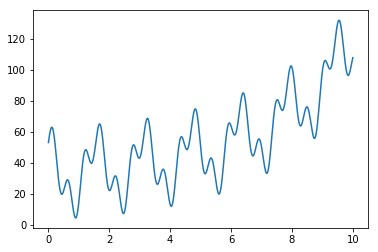

In [12]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: 12 * np.sin(12 * x) + 20 * np.cos(4 * x) + 3 * np.exp(x/3) + 30
x = np.linspace(0, 10, 1000)
_ = plt.plot(x,f(x))

In [13]:
largura = 10
altura = 140
numero_simulacao = 50000

x_v = np.random.uniform(0, largura, numero_simulacao) 
y_v = np.random.uniform(0, altura, numero_simulacao)

In [14]:
x_v

array([ 4.78447031,  0.97171625,  7.64658805, ...,  0.46628852,
        5.88992171,  1.16843071])

In [15]:
pontos_abaixo_curva = y_v < f(x_v)
proporcao_area_abaixo_fx = np.sum(pontos_abaixo_curva) / numero_simulacao
proporcao_area_abaixo_fx

0.39062000000000002

In [16]:
area_total = largura * altura
area_abaixo_fx = area_total * proporcao_area_abaixo_fx
area_abaixo_fx

546.86800000000005

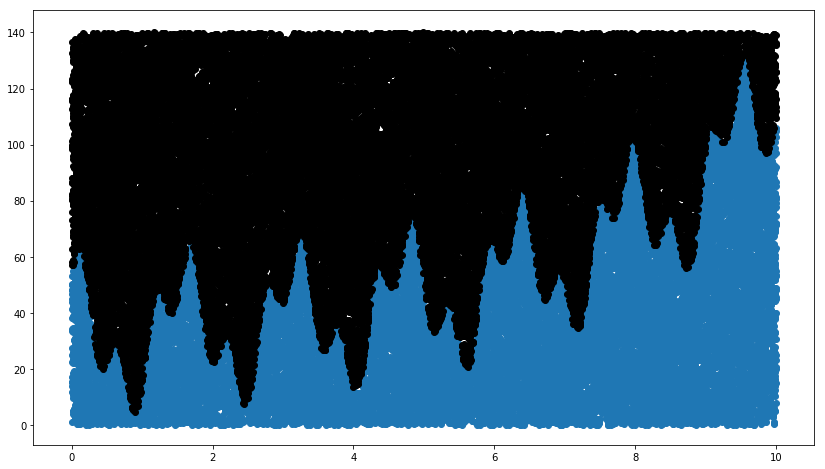

In [17]:
fig = plt.figure(figsize=(14,8))
plt.scatter(x_v[pontos_abaixo_curva], y_v[pontos_abaixo_curva])
plt.scatter(x_v[~pontos_abaixo_curva], y_v[~pontos_abaixo_curva], c='black');

## 4.5 Simulação de Monte Carlo – Precificação de opções europeias

In [18]:
import numpy as np
def monte_carlo_europeia(S0, K, T, r, sigma, q, N=1000000):
    z = np.random.standard_normal(N) 
    ST = S0 * np.exp((r - q - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z) 
    pT = np.maximum(ST - K, 0) 
    return np.mean(pT) * np.exp(-r * T) 

In [19]:
monte_carlo_europeia(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03)

0.84402692872105645

## 4.6 Simulação de Monte Carlo – Opções que dependem do caminho

In [20]:
import numpy as np
def monte_carlo_asiatica(S0, K, T, r, sigma, q, media_dias, dias_no_ano=252.0, N=10000): 
    delta_t = 1.0 / dias_no_ano
    S = np.zeros((media_dias, N)) 
    t_inicial = T - (media_dias - 1) * delta_t
    sn = np.random.standard_normal((media_dias, N)) 
    
    # Simula o valor do primeiro dia usado na média
    S[0] = S0 * np.exp((r - q - 0.5 * sigma ** 2) * t_inicial + sigma * np.sqrt(t_inicial) * sn[0]) 
    
    # Simula os outros dias
    for j in range(1, media_dias):
        S[j] = S[j - 1] * np.exp((r - q - 0.5 * sigma ** 2)*delta_t + sigma * np.sqrt(delta_t) * sn[j]) 
    
    # Calcula o payoff
    pT = np.maximum(np.average(S, axis=0) - K, 0)
    return np.mean(pT) * np.exp(-r * T)

In [21]:
monte_carlo_asiatica(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03, media_dias=30)

0.76767824935032736

In [22]:
monte_carlo_asiatica(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03, media_dias=1)

0.87356627096136186

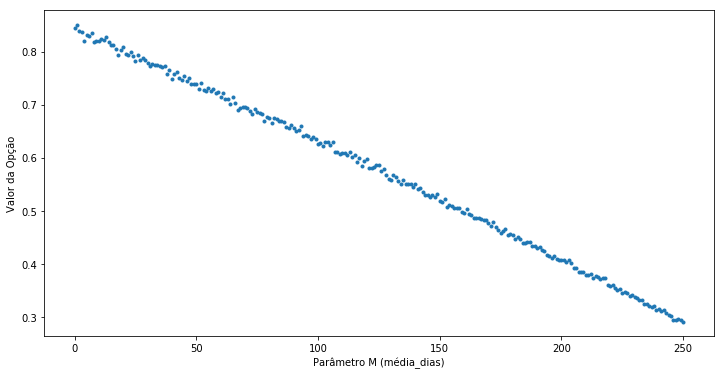

In [23]:
asian_option = np.zeros(252)
for i in range(1, 252):
    asian_option[i] = monte_carlo_asiatica(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03, media_dias=i, N=100000)  

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))
ax.set_ylabel('Valor da Opção')
ax.set_xlabel('Parâmetro M (média_dias)')
_ = plt.plot(asian_option[1:], '.')    

## 4.7 Modelo Longstaff e Schwartz




In [24]:
import numpy as np
def monte_carlo_longstaff_schwartz(S0, K, T, r, sigma, q, N=500000, P=40): 
    delta_t = T / P
    df = np.exp(-r * delta_t)
    S = np.zeros((P + 1, N))
    
    # Simula o valor do ativo
    S[0] = S0
    sn = np.random.standard_normal((P + 1, N))
    for t in range(1, P + 1):
        S[t] = S[t - 1] * np.exp((r - q - 0.5 * sigma ** 2) *
                    delta_t + sigma * np.sqrt(delta_t) * sn[t]) 
   
    # Longstaff Schwartz
    V = np.maximum(S - K, 0) 
    for t in reversed(range(P)): 
        mask = V[t] > 0 
        if np.sum(mask) > 3: 
            reg = np.polyfit(S[t][mask], V[t + 1][mask] * df, deg=3) 
            v_esperado = np.polyval(reg, S[t][mask]) 
            V[t][mask] = np.where(V[t][mask] > v_esperado, V[t][mask],
                    V[t + 1][mask] * df) 
            V[t][~mask] = V[t + 1][~mask] * df 
        else: 
            V[t] = V[t + 1] * df
   
    return np.mean(V[0])

In [25]:
monte_carlo_longstaff_schwartz(S0=8.5, K=10, T=1.0, r=0.10, sigma=0.35, q=0.03)

0.83769983372212198

## 4.8 Gregas

#### 4.8.1 Delta


In [26]:
def delta_formula(S0, K, T, r, sigma, q):
    d1 = (log(S0 / K) + (r - q + (sigma ** 2)/2) * T) / (sigma * sqrt(T))
    return exp(-q* T) * stats.norm.cdf(d1, 0.0, 1.0)

In [27]:
delta_formula(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03)

0.45068066334990481

In [28]:
from math import log, sqrt, exp
from scipy import stats
def black_scholes(S0, K, T, r, vol, q):
    d1 = (log(S0 / K) + (r - q +  (vol ** 2)/2) * T) / (vol * sqrt(T))
    d2 = d1 - vol * sqrt(T)
    value = (S0 * exp(-q * T) * stats.norm.cdf(d1, 0.0, 1.0) - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

In [29]:
def delta_dif_black_scholes(S0, K, T, r, sigma, q, ds=0.001):
    x1 = black_scholes(S0 - ds, K, T, r, sigma, q)
    x2 = black_scholes(S0 + ds, K, T, r, sigma, q)
    return (x2 - x1) / (2 * ds)

In [30]:
delta_dif_black_scholes(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03)

0.45068066145725894

In [31]:
def delta_dif_arvore_binomial(S0, K, T, r, sigma, q, ds=0.001):
    x1 = arvore_binomial_completa(S0 - ds, K, T, r, sigma, q)
    x2 = arvore_binomial_completa(S0 + ds, K, T, r, sigma, q)
    return (x2 - x1) / (2 * ds)

In [32]:
delta_dif_arvore_binomial(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03)

0.4295720142865611

In [33]:
import numpy as np
def monte_carlo_europeia(S0, K, T, r, sigma, q, N=10000000, seed=0):
    np.random.seed(seed)
    z = np.random.standard_normal(N)
    ST = S0 * np.exp((r - q - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)
    pT = np.maximum(ST - K, 0)
    return np.mean(pT) * np.exp(-r * T)

In [34]:
def delta_dif_monte_carlo(S0, K, T, r, sigma, q, ds=0.001):
    x1 = monte_carlo_europeia(S0 - ds, K, T, r, sigma, q, seed=0)
    x2 = monte_carlo_europeia(S0 + ds, K, T, r, sigma, q, seed=0)
    return (x2 - x1) / (2 * ds)

In [35]:
delta_dif_monte_carlo(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03)

0.45078801367792742

#### 4.8.2 Gamma

In [36]:
def gamma_dif_black_scholes(S0, K, T, r, sigma, q, ds=0.001):
    x1 = black_scholes(S0 + ds , K, T, r, sigma, q)
    x2 = -2 * black_scholes(S0, K, T, r, sigma, q)
    x3 = black_scholes(S0 - ds , K, T, r, sigma, q)
    return (x1 + x2 + x3) / (ds**2)

In [37]:
gamma_dif_black_scholes(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03)

0.1296167333464382

#### 4.8.3 Theta

In [38]:
def theta_dif_black_scholes(S0, K, T, r, sigma, q, ds=0.01):
    x1 = black_scholes(S0, K, T - ds, r, sigma, q)
    x2 = black_scholes(S0, K, T + ds, r, sigma, q)
    return -(x2 - x1) / (2*ds)

In [39]:
theta_dif_black_scholes(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03)/100

-0.0075745901153336792

In [40]:
def theta_1dia_black_scholes(S0, K, T, r, sigma, q, base=252.0):
    x1 = black_scholes(S0, K, (T * base - 1)/base, r, sigma, q)
    x2 = black_scholes(S0, K, T, r, sigma, q)
    return -(x2 - x1)

In [41]:
theta_1dia_black_scholes(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03)

-0.0030079030027372333

#### 4.8.4 Vega

In [42]:
def vega_dif_black_scholes(S0, K, T, r, sigma, q, ds=0.01):
    x1 = black_scholes(S0, K, T, r, sigma - ds, q)
    x2 = black_scholes(S0, K, T, r, sigma + ds, q)
    vega_1 = (x2 - x1) / (2 * ds)
    return vega_1 / 100

In [43]:
vega_dif_black_scholes(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03)

0.032775766747360713

In [44]:
bs_vol35 = black_scholes(8.5, 10.0, 1.0, 0.10, 0.35, 0.03)
bs_vol36 = black_scholes(8.50, 10.0, 1.0, 0.10, 0.35 + 0.01, 0.03)
bs_vol36 - bs_vol35

0.032794171262257255

#### 4.8.5 Rhô

In [45]:
def rho_dif_black_scholes(S0, K, T, r, sigma, q, ds=0.01):
    x1 = black_scholes(S0, K, T, r - ds, sigma, q)
    x2 = black_scholes(S0, K, T, r + ds, sigma, q)
    rho_1 = (x2 - x1) / (2 * ds)
    return rho_1 / 100

In [46]:
rho_dif_black_scholes(S0=8.50, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03)

0.029877761172990347

#### 4.8.6 Análise das Gregas


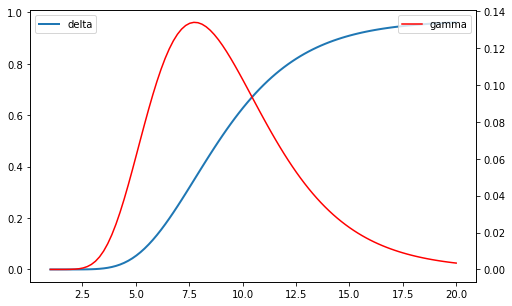

In [47]:
delta_bs_v = np.vectorize(delta_dif_black_scholes)
gamma_bs_v = np.vectorize(gamma_dif_black_scholes)
vS0 = np.linspace(1, 20, 100)

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()
ax1.plot(vS0, delta_bs_v(S0=vS0, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03), linewidth=2, label='delta') 
ax2.plot(vS0, gamma_bs_v(S0=vS0, K=10.0, T=1.0, r=0.10, sigma=0.35, q=0.03), 'r', label='gamma')
ax1.legend(); ax2.legend();

## 4.9 Volatilidade


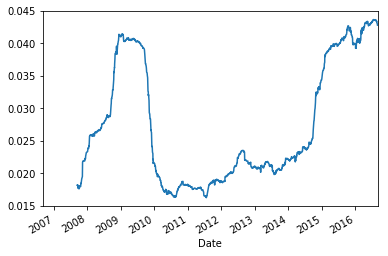

In [48]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
petr = web.DataReader('PETR4.SA', data_source='yahoo', start='8/31/2006', end='8/31/2016').dropna()
petr['Log Ret'] = np.log(petr['Adj Close'] / petr['Adj Close'].shift(1)) 
petr['vol_252'] = petr['Log Ret'].rolling(window=252, center=False).std()
petr['vol_252'].plot();

In [49]:
petr = web.DataReader('PETR4.SA', data_source='yahoo', start='8/31/2006', end='8/31/2016')
petr.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-25,12.42,12.64,12.35,12.53,12.53,40290500.0
2016-08-26,12.69,12.90,12.45,12.55,12.55,50650500.0
2016-08-29,12.50,12.96,12.45,12.87,12.87,36990100.0
2016-08-30,13.04,13.23,12.97,13.09,13.09,51893700.0
2016-08-31,13.13,13.22,12.71,12.85,12.85,61016100.0


In [50]:
petr['Log Ret'] = np.log(petr['Adj Close'] / petr['Adj Close'].shift(1))
petr.tail()

,Open,High,Low,Close,Adj Close,Volume,Log Ret
Date,,,,,,,
2016-08-25,12.42,12.64,12.35,12.53,12.53,40290500.0,0.010429
2016-08-26,12.69,12.90,12.45,12.55,12.55,50650500.0,0.001595
2016-08-29,12.50,12.96,12.45,12.87,12.87,36990100.0,0.025178
2016-08-30,13.04,13.23,12.97,13.09,13.09,51893700.0,0.016950
2016-08-31,13.13,13.22,12.71,12.85,12.85,61016100.0,-0.018505


In [51]:
from scipy import optimize
def volatilidade_implicita_black_scholes(S0, K, T, r, q, price):
    def vol_function(sigma): 
        return black_scholes(S0, K, T, r, sigma, q) - price 
    return optimize.fsolve(vol_function, 0.40)[0]

In [52]:
volatilidade_implicita_black_scholes(S0=8.50, K=10.0, T=1.0, r=0.10, q=0.03, price=0.60)

0.27540212470094033

In [53]:
from scipy import optimize
def volatilidade_implicita_arvore_binomial(S0, K, T, r, q, price):
    def vol_function(sigma):
        return arvore_binomial_completa(S0, K, T, r, sigma, q) -  price 
    return optimize.fsolve(vol_function, .40)[0]

In [54]:
volatilidade_implicita_arvore_binomial(S0=8.50, K=10.0, T=1.0, r=0.10, q=0.03, price=1)

0.39754137954395169

## 4.10 Algumas questões práticas: pontos de atenção em relação aos parâmetros

In [55]:
import numpy as np

In [56]:
np.log(1 + 0.10)

0.095310179804324935